In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATASET_DIR = '/data'

# データセット読み込み

In [ ]:
path = os.path.join(DATASET_DIR, 'xhamster.json')
xhamster_dataset = pd.read_json(path)
xhamster_dataset.info()
xhamster_dataset.head()  # いい感じにデータを表示

In [ ]:
xhamster_dataset.describe()

# 分析

## タグの人気ランキングをつける

In [4]:
tags = xhamster_dataset.loc['channels']
tags = tags.values.tolist()
tags

[[u'Amateur', u'Blondes', u'Tits', u'Webcams'],
 [u'Hardcore', u'Lesbians'],
 [u'Amateur', u'Masturbation', u'Sex Toys', u'Teens', u'Webcams'],
 [u'Anal', u'Hardcore', u'Latin '],
 [u'Amateur', u'Softcore', u'Teens'],
 [u'BBW', u'Matures', u'MILFs'],
 [u'BBW', u'Interracial', u'Matures'],
 [u'Matures', u'MILFs', u'Threesomes'],
 [u'Anal', u'Fingering', u'Webcams'],
 [u'Men'],
 [u'Men'],
 [u'Men'],
 [u'Anal', u'Babes', u'Interracial'],
 [u'Amateur', u'Cumshots', u'Teens'],
 [u'Masturbation', u'Sex Toys'],
 [u'Amateur', u'Hidden Cams', u'Voyeur'],
 [u'Blowjobs', u'MILFs', u'Squirting'],
 [u'Men'],
 [u'Amateur', u'Blowjobs'],
 [u'Amateur', u'Fingering', u'Teens'],
 [u'Men'],
 [u'Men'],
 [u'Ladyboys', u'Shemales'],
 [u'Amateur', u'Emo', u'Hardcore'],
 [u'Amateur', u'Cuckold', u'Gangbang'],
 [u'Amateur', u'Turkish'],
 [u'Big Boobs', u'Blowjobs', u'Hardcore'],
 [u'Anal'],
 [u'Amateur', u'Matures'],
 [u'Gangbang', u'Interracial'],
 [u'Amateur', u'Anal', u'Brunettes'],
 [u'Babes', u'Blondes', 

In [5]:
flatten = lambda x: [z for y in x for z in (flatten(y) if hasattr(y, '__iter__') else (y,))]
tags = flatten(tags)

In [6]:
import collections
tag_ranking = collections.Counter(tags)
tag_ranking

Counter({u'Amateur': 223139,
         u'Anal': 63762,
         u'Arab': 4421,
         u'Asian': 34402,
         u'BBW': 33421,
         u'BDSM': 15214,
         u'Babes': 44389,
         u'Babysitters': 672,
         u'Beach': 3534,
         u'Big Boobs': 53226,
         u'Bisexuals': 3928,
         u'Black Gays': 4834,
         u'Black and Ebony': 32716,
         u'Blondes': 38773,
         u'Blowjobs': 65050,
         u'Brazilian': 3813,
         u'British': 7383,
         u'Brunettes': 30405,
         u'Bukkake': 2980,
         u'Cartoons': 1542,
         u'Celebrities': 8858,
         u'Chinese': 892,
         u'Close-ups': 13611,
         u'Cream Pie': 10370,
         u'Cuckold': 6402,
         u'Cumshots': 46734,
         u'Czech': 1538,
         u'Danish': 699,
         u'Double Penetration': 8972,
         u'Emo': 1046,
         u'Face Sitting': 2331,
         u'Facials': 23114,
         u'Femdom': 9941,
         u'Fingering': 12266,
         u'Flashing': 9406,
         u'Foot

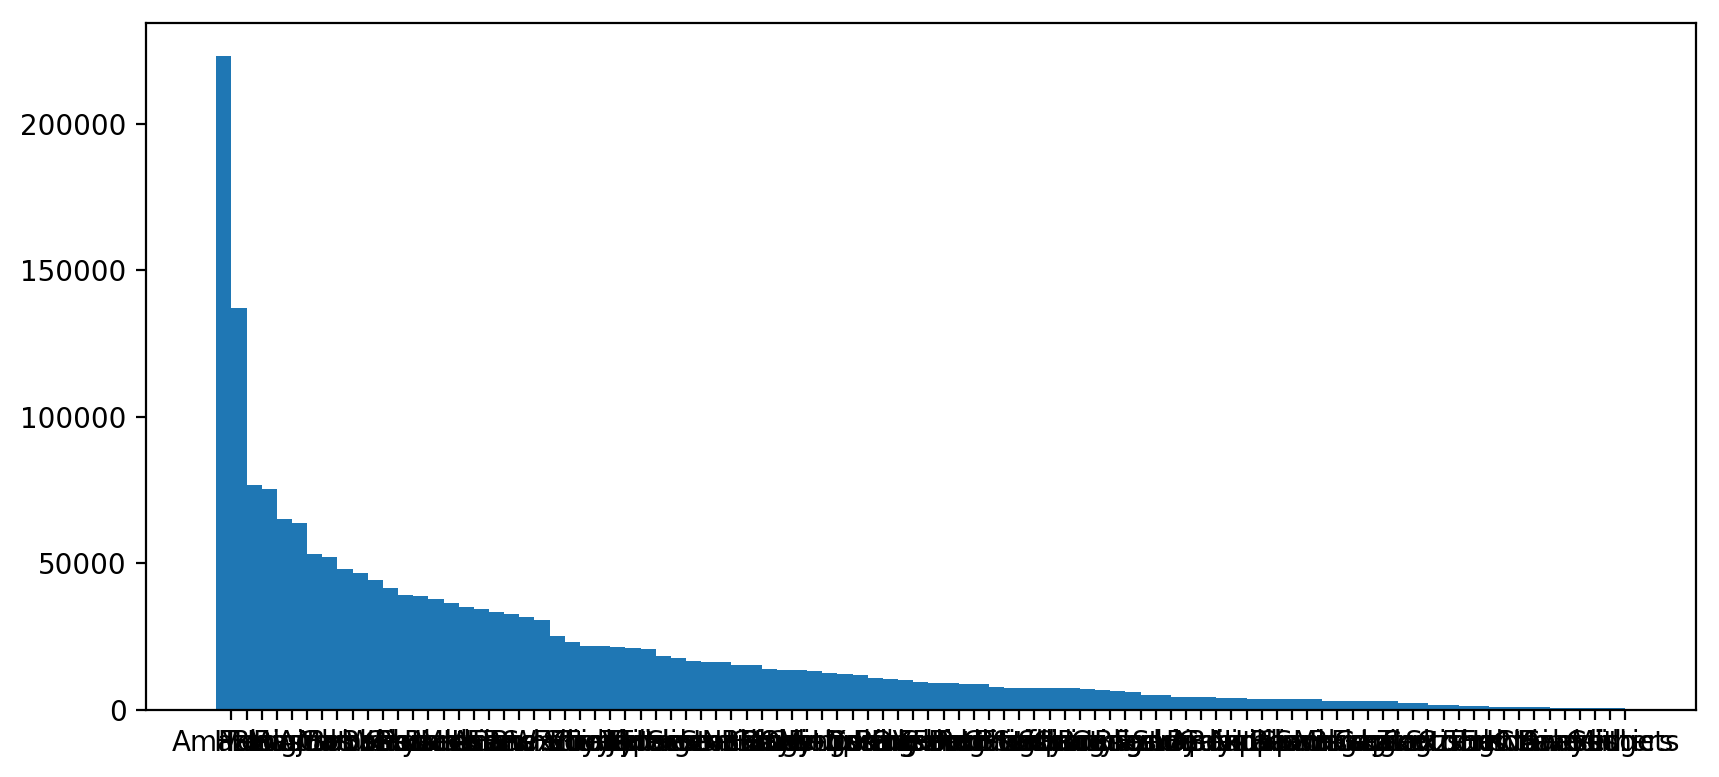

In [16]:
xy = tag_ranking.most_common()

labels = []
values = []
for label, val in xy:
    labels.append(label)
    values.append(val)

indexes = np.arange(len(labels))
width = 1

fig = plt.figure(figsize=(10,10),dpi=200)
ax1 = fig.add_subplot(2,1,1)

ax1.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

## タグごとに再生数を比べる

In [ ]:
result = []
for tag, value in tag_ranking:
    # タグを含む列を取り出す
    data = xhamster_dataset[tag in xhamster_dataset['channels']]
    data = data['nb_views'].values
    result.append(data.sum() / float(value))
    
result